## **PROBLÉMATIQUE** : Quels sont les facteurs qui influencent le succès d’une campagne Kickstarter sur les trois dernières années ? (2022-2024)

**IDENTIFIER LES VARIABLES IMPORTANTES :**

**state** (réussite ou échec) : object, variable cible

**category** : object


**country** : object

**goal** : int64

**spotlight** (si le projet a été mis en avant par Kickstarter) : bool

**staff_pick** (indique si le projet est un coup de coeur de l’équipe Kickstarter) : bool

**bakers_count** (nombre de contributeurs ayant soutenu le projet) : int64

**pledge** (montant total collecté) : float

**campaign_duration** : int64

**HYPOTHÈSES** :

**Thèmes** : Est-ce que certaines catégories réussissent mieux que d’autres ?

**Financière** : Est-ce que l’objectif fixé/le montant à un impact sur le succès de la campagne ?

**Durée** : Est-ce que la durée de la campagne de financement joue ?


**Géographiques** : Est-ce que certains pays réussissent mieux que d'autres, en particulier les USA (Kickstarter étant une entreprise américaine) ?

**Temporelles** : Y a t-il une tendance à la baisse ou à la hausse en fonction des années ?

### **Préparation du dataset et installation des bibliothèques**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -q gdown

In [ ]:
# Télécharger le dossier complet avec son ID
!gdown --folder --id 1OmKB7NzMuG2CZI5oWNmk3MFBOtYkJAkc -O /content/data_partage

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1sMCehGIluL7FWpWuA8uGbjGlAjBlXFPO Copie de Etape 2_representations_graphiques
Processing file 1AibjdQBSyf0nYw4tT_3LT0UtduRcnNiEyu5CvxqhtsM Copie de Projets méthodologie rapports DA
Processing file 13CkjsBM1Qcgz-WRlm7krz8946IQNcE6H data_clean.parquet
Processing file 1oIxK_8yyLT4mXmgFsZCdaf-OnLO5kEm- Étape 2 - Représentations graphiques 
Processing file 1xjdTyu3dzKqsGKeiekls2GwpQOr3ZZQEe-1O4shhNW0 Representations graphiques
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1sMCehGIluL7FWpWuA8uGbjGlAjBlXFPO
To: /content/data_partage/Copie de Etape 2_representations_graphiques
100% 121k/121k [00:00<00:00, 66.6MB/s]
Downloadin

In [ ]:
import os

# Lister les fichiers téléchargés
os.listdir("/content/data_partage")

['Étape 2 - Représentations graphiques ',
 'Copie de Projets méthodologie rapports DA',
 'data_clean.parquet',
 'Copie de Etape 2_representations_graphiques',
 'Representations graphiques']

In [ ]:
import pandas as pd

file_path = 'https://drive.google.com/uc?id=13CkjsBM1Qcgz-WRlm7krz8946IQNcE6H'
df = pd.read_parquet(file_path)

display(df.head())

,backers_count,blurb,converted_pledged_amount,country,country_displayable_name,created_at,currency,deadline,disable_communication,goal,...,percent_funded,pledged,prelaunch_activated,spotlight,staff_pick,state,usd_pledged,video,category_name,campaign_duration
0,240,We map the contours of your face to guarantee ...,12448.0,US,the United States,2022-05-31 11:54:20,USD,2022-11-25 04:59:00,False,35000.0,...,35.565714,12448.0,False,False,False,failed,12448.000000,1,Wearables,177
1,13,Modern and unique Watch with Numitron tubes fr...,3636.0,AT,Austria,2022-05-25 16:30:59,EUR,2022-06-30 22:07:31,False,7600.0,...,45.776316,3479.0,False,False,False,failed,3740.377583,1,Wearables,36
2,2,Busco financiación para fabricar un prototipo ...,2.0,ES,Spain,2022-02-12 22:54:57,EUR,2022-04-01 15:10:13,False,5000.0,...,0.040000,2.0,False,False,False,failed,2.264411,1,Wearables,47
3,1,OMO ROLLING LOUD AFTERPARTY JULY22,1.0,US,the United States,2023-07-15 20:41:44,USD,2023-07-23 02:59:00,False,2200.0,...,0.045455,1.0,False,False,False,failed,1.000000,1,Hip-Hop,7
4,2,Join Young Mystery's mission to reshape hip ho...,2.0,US,the United States,2023-06-21 16:32:59,USD,2023-08-25 02:37:39,False,25000.0,...,0.008000,2.0,False,False,False,failed,2.000000,1,Hip-Hop,64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694713 entries, 0 to 694712
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   backers_count             694713 non-null  int64         
 1   blurb                     694713 non-null  object        
 2   converted_pledged_amount  694713 non-null  float64       
 3   country                   694713 non-null  object        
 4   country_displayable_name  694713 non-null  object        
 5   created_at                694713 non-null  datetime64[ns]
 6   currency                  694713 non-null  object        
 7   deadline                  694713 non-null  datetime64[ns]
 8   disable_communication     694713 non-null  bool          
 9   goal                      694713 non-null  float64       
 10  id                        694713 non-null  int64         
 11  is_disliked               694713 non-null  bool          
 12  is

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **HYPOTHESE 1**

**Thèmes : Est-ce que certaines catégories réussissent mieux que d’autres ?**  

In [ ]:
# Limiter aux 3 états principaux
df_states = df[df['state'].isin(['successful','failed','canceled'])].copy()

# Comptage par catégorie + état
cat_state_all = (
    df_states.groupby(['category_name','state'])
    .size()
    .reset_index(name='count')
)

# Normalisation en % par catégorie
cat_state_all['total'] = cat_state_all.groupby('category_name')['count'].transform('sum')
cat_state_all['pct']   = (cat_state_all['count'] / cat_state_all['total']) * 100

fig2 = px.bar(
    cat_state_all,
    x='category_name',
    y='pct',
    color='state',
    title='Répartition des états par catégorie (2022–2024)',
    labels={'category_name':'Catégorie', 'pct':'%'}
)
fig2.update_layout(barmode='stack', xaxis_tickangle=45, xaxis_tickfont_size=9, height=600)
fig2.show()

Chaque barre est normalisée à 100 % (calcul fait en amont) pour montrer la part de succès, échecs et annulations par catégorie. La vue globale est informative mais chargée

**Interprétation**
	•	Ce graphique en barres empilées montre la composition % “canceled/failed/successful” pour chaque catégorie. On observe des cas extrêmes :
	•	“Apps” affiche ~84 % d’échecs, donc ~16 % de succès seulement.  ￼
	•	À l’inverse, “Product Design” et “Graphic Novels” ont des taux d’échec quasi nuls (≈0,002 % et ≈0,006 %), suggérant un succès quasi systématique.  ￼
	•	Moralité : au delà du taux de succès moyen, regarder la part d’échecs (et, secondairement, d’annulations) par catégorie aide à cerner le risque.


En une phrase : certaines catégories cumulent structurellement beaucoup d’échecs (“Apps”, “Bacon”, “Accessories”), d’autres réussissent presque toujours (“Product Design”, “Graphic Novels”).  ￼

In [ ]:
df_top_states = df_top[df_top['state'].isin(['successful','failed','canceled'])].copy()

cat_state_top = (
    df_top_states.groupby(['category_name','state'])
    .size()
    .reset_index(name='count')
)
cat_state_top['total'] = cat_state_top.groupby('category_name')['count'].transform('sum')
cat_state_top['pct']   = (cat_state_top['count'] / cat_state_top['total']) * 100

# Garder le même ordre que le graphe 3
order_cats = success_rate_top['category_name'].tolist()

fig4 = px.bar(
    cat_state_top,
    x='category_name',
    y='pct',
    color='state',
    title='Répartition des états par catégorie — Top 15 (2022–2024)',
    labels={'category_name':'Catégorie (Top 15)', 'pct':'%'},
    category_orders={'category_name': order_cats}
)
fig4.update_layout(barmode='stack', xaxis_tickangle=45, xaxis_tickfont_size=11, height=500)
fig4.show()

**HYPOTHESE 1 : Thèmes : Est-ce que certaines catégories réussissent mieux que d’autres ?**

Observation générale
Les résultats montrent clairement que certaines **catégories réussissent mieux que d’autres**.  
- Les catégories comme **Dance, Theater, Comics, Music** présentent des **taux de succès élevés** : la majorité des campagnes atteignent leur objectif.  
- À l’inverse, des catégories comme **Technology, Games, Design** affichent des **taux de succès nettement plus faibles**, avec une part importante de projets échoués ou annulés.  
- Cette hétérogénéité confirme que le **domaine choisi influence significativement la probabilité de réussite** d’une campagne Kickstarter.

Recommandations métier
1. **Ciblage stratégique**  
   - Pour les catégories à fort succès (ex. *Dance, Theater, Comics*), encourager davantage de campagnes et mettre en avant ces segments attractifs.  
   - Pour les catégories à plus faible succès (ex. *Technology, Games*), fournir un accompagnement renforcé (guides de communication, coaching sur la préparation des campagnes).

2. **Optimisation de la plateforme**  
   - Mettre en avant sur la page d’accueil des projets issus des catégories performantes afin d’**accroître la confiance des contributeurs**.  
   - Donner aux porteurs des catégories plus risquées des **indicateurs comparatifs** pour ajuster leurs objectifs (montant, durée, stratégie).

3. **Segmentation marketing**  
   - Adapter la communication selon le type de catégorie :  
     - **Arts et culture** → valoriser le storytelling et la dimension communautaire.  
     - **Technologie / design** → insister sur la démonstration de faisabilité, les preuves techniques et la crédibilité financière.

---
➡️ En résumé : *le choix de la catégorie conditionne largement la probabilité de succès*. La plateforme doit jouer un rôle d’accompagnement différencié pour maximiser la réussite de ses porteurs de projets.

## **HYPOTHESE 2**

**Financière : Est-ce que l’objectif fixé/le montant à un impact sur le succès de la campagne ?**

In [ ]:
#Test statistique
from scipy import stats

# Séparation des objectifs pour les campagnes réussies et échouées
successful_goals = df[df['state'] == 'successful']['goal']
failed_goals = df[df['state'] == 'failed']['goal']

# t-test pour échantillons indépendants
ttest_result_goal = stats.ttest_ind(successful_goals, failed_goals)

# Affichage des résultats
print(f"Résultats du test t pour les objectifs :")
print(f"  Statistique : {ttest_result_goal.statistic:.4f}")
print(f"  Valeur p : {ttest_result_goal.pvalue:.4f}")

# Interpréter les résultats
alpha = 0.05
if ttest_result_goal.pvalue < alpha:
    print("\nInterprétation : La différence d'objectif moyen entre les campagnes réussies et échouées est statistiquement significative.")
else:
    print("\nInterprétation : La différence d'objectif moyen entre les campagnes réussies et échouées n'est pas statistiquement significative.")

Résultats du test t pour les objectifs :
  Statistique : -15.6846
  Valeur p : 0.0000

Interprétation : La différence d'objectif moyen entre les campagnes réussies et échouées est statistiquement significative.


,goal
count,6.947130e+05
mean,6.650508e+04
std,4.328603e+06
min,1.000000e+00
25%,1.000000e+03
50%,4.000000e+03
75%,1.070000e+04
max,1.000000e+09


Seuil 95% : 75000.0


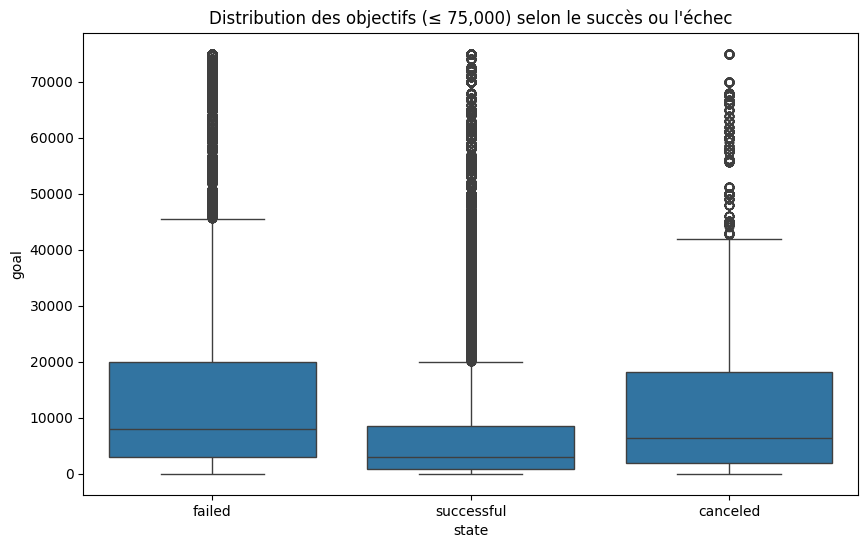

In [ ]:
#Vérification de la répartition des objectifs
display(df["goal"].describe())

# Calcul du seuil 95% (valeur sous laquelle tombent 95% des campagnes)
seuil = df["goal"].quantile(0.95)
print("Seuil 95% :", seuil)

# Filtrage
df_filtre = df[df["goal"] <= seuil]
plt.figure(figsize=(10,6))
sns.boxplot(data= df_filtre, x="state", y="goal")
plt.title(f"Distribution des objectifs (≤ {int(seuil):,}) selon le succès ou l'échec")
plt.show()

**Observation générale** :

Les campagnes réussies ont en moyenne des objectifs financiers plus bas.

Les campagnes échouées ont des objectifs plus élevés (la médiane est plus haute que pour les campagnes réussies).

Les campagnes annulées (canceled) se situent à un niveau intermédiaire.

**Variabilité** :

Les projets réussis sont concentrés autour d’objectifs modestes (souvent quelques milliers de dollars).

Les projets échoués montrent une grande dispersion : beaucoup de campagnes ont tenté de demander des montants très élevés et de ce fait, elles échouent plus souvent.

On remarque aussi des outliers (points isolés) dans chaque catégorie : ce sont les campagnes qui avaient des objectifs atypiques (ex. 50k ou plus).

**Conclusion** :
Ce graphique confirme l’hypothèse que plus l’objectif fixé est élevé, plus la probabilité d’échec est importante.
Cependant, il existe toujours des exceptions : certains projets très ambitieux atteignent quand même leur objectif, mais ils sont rares.

/tmp/ipython-input-542749639.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-542749639.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




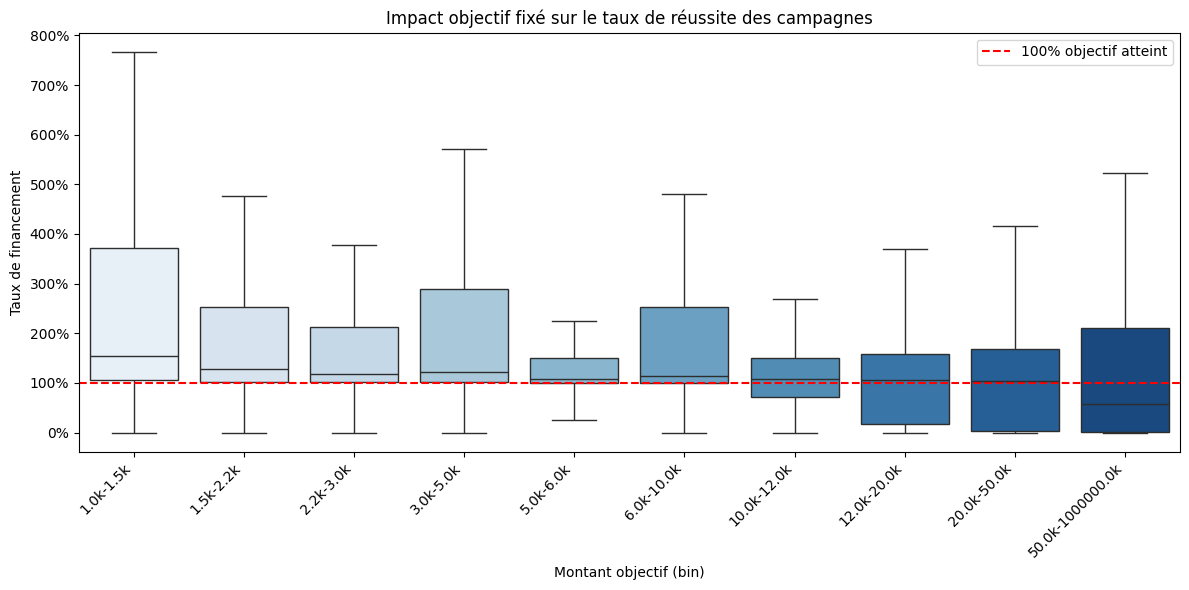

In [ ]:
import matplotlib.ticker as mtick

# Filtrer les campagnes avec goal >= 1000
df_filtered = df[df['goal'] >= 1000].copy()

# Créer taux de financement
df_filtered['taux_funding'] = df_filtered['pledged'] / df_filtered['goal']

# Créer 10 tranches
df_filtered['goal_bin'] = pd.qcut(df_filtered['goal'], q=10)

# Labels arrondis pour éviter 0k
df_filtered['goal_bin_label'] = df_filtered['goal_bin'].apply(
    lambda x: f"{round(x.left/1000,1)}k-{round(x.right/1000,1)}k"
)

# Forcer ordre croissant
bin_order = df_filtered.groupby('goal_bin_label')['goal'].min().sort_values().index
df_filtered['goal_bin_label'] = pd.Categorical(df_filtered['goal_bin_label'], categories=bin_order, ordered=True)

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    x='goal_bin_label',
    y='taux_funding',
    data=df_filtered,
    showfliers=False,
    palette="Blues"
)
plt.axhline(1, color='red', linestyle='--', label='100% objectif atteint')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Taux de financement')
plt.xlabel('Montant objectif (bin)')
plt.title('Impact objectif fixé sur le taux de réussite des campagnes')
plt.legend()
plt.tight_layout()
plt.show()

**Interprétation**

L’analyse du boxplot met en évidence une relation claire entre le montant de l’objectif fixé et le taux de financement des campagnes.

On observe que pour des objectifs fixés compris entre 1 000 € et 10 000 €, le taux de financement se situe déjà au-dessus de 100 %. La majorité des campagnes de ces bins dépassent 100 % (puisque Q1 > 100 %).

En revanche, au-delà de 10 000 €, la tendance s’inverse : le premier quartile et la médiane redescendent en dessous du seuil des 100 %. Autrement dit, une part importante des campagnes ne parvient plus à atteindre intégralement leur objectif, et la probabilité de succès diminue nettement.

De manière globale, ces résultats suggèrent une **corrélation négative entre la hauteur de l’objectif et le taux de financement : plus le montant demandé est élevé, plus les chances de réussite de la campagne diminuent**.

**Campagnes surfinancées**

L’analyse du boxplot des taux de financement met en évidence non seulement la tendance générale à la réussite selon l’objectif fixé, mais également l’importance des campagnes surfinancées.

Pour les objectifs modestes (1 000 à 5 000 €), la plupart des campagnes dépassent largement leur objectif :

1 000–1 500 € : taux de financement de 100 % à 370 %

1 500–2 002 € : 100 % à 250 %

2 002–3 000 € : 100 % à 210 %

3 000–5 000 € : 100 % à 300 %

Cela montre que les campagnes avec un objectif faible non seulement réussissent, mais bénéficient souvent d’un effet de surfinancement, avec certaines campagnes multipliant par 2 à 3 fois leur objectif initial.

Pour les objectifs intermédiaires (5 000–10 000 €), les dépassements restent possibles mais moins spectaculaires : 100% à 250%


Pour les objectifs élevés (>10 000 €), on observe deux phénomènes :

La médiane et Q1 du taux de financement descendent souvent sous 100 %, ce qui signifie que de nombreuses campagnes n’atteignent pas leur objectif.

Cependant, certaines campagnes connaissent des dépassements importants, illustrant une forte dispersion :

10 000–12 000 € : 50 % à 150 %

12 000–20 000 € : 30 % à 150 %

20 000–50 000 € : 10 % à 160 %

50 000–1 000 000 € : 10 % à 200 %

Cette analyse met en évidence deux points clés :

Les petits objectifs favorisent non seulement le succès, mais aussi le surfinancement, ce qui peut être attractif pour les porteurs de projet et les contributeurs.

Les objectifs élevés sont plus risqués : la majorité des campagnes n’atteint pas 100 %, mais celles qui réussissent peuvent parfois générer des montants très supérieurs à l’objectif initial.

**Insight métier** :

Pour maximiser les chances de succès et de surfinancement, il est conseillé de fixer un objectif réaliste, idéalement inférieur à 10 000 €, ou de segmenter les objectifs élevés en paliers, afin de stimuler la participation des contributeurs tout en limitant le risque d’échec.


In [ ]:
# Filtrer les campagnes avec goal >= 1000
df_filtered = df[df['goal'] >= 1000].copy()

# Créer les bins (10 tranches)
df_filtered['goal_bin'] = pd.qcut(df_filtered['goal'], q=10)

# Calculer le taux de succès par bin
success_rate = df_filtered.groupby('goal_bin')['state'].apply(lambda x: (x=='successful').mean()*100).reset_index()

# Ajouter des labels lisibles pour l'axe x
success_rate['goal_bin_label'] = success_rate['goal_bin'].apply(lambda x: f"{round(x.left/1000,1)}k-{round(x.right/1000,1)}k")

# Créer le barplot interactif
fig = px.bar(
    success_rate,
    x='goal_bin_label',
    y='state',
    text='state',
    labels={'state': 'Taux de succès (%)', 'goal_bin_label': 'Montant objectif (bin)'},
    title='Proportion de campagnes réussies par tranche de Goal',
    color='state',  # optionnel, tu peux mettre une couleur fixe
    color_continuous_scale='Blues'
)

# Améliorer l'apparence
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,100]))
fig.show()

/tmp/ipython-input-414086633.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Interprétation**

L’analyse du taux de succès des campagnes en fonction du montant de l’objectif montre une tendance négative très nette : plus l’objectif fixé est élevé, moins la probabilité de réussite est importante.

Pour les objectifs faibles (1 000 à 1 500 €), le taux de succès est très élevé : 86,15 % des campagnes atteignent leur objectif.

En montant légèrement, de 1 505 à 2 002 €, le taux reste élevé à 84,82 %, et il diminue progressivement à 82,57 % pour 2 002–3 000 € et 80,70 % pour 3 000–5 000 €.

Pour les objectifs intermédiaires (5 000–10 000 €), le taux de succès se situe autour de 75–76 %, ce qui reste correct mais montre un début de diminution.

Les objectifs élevés (>10 000 €) voient une baisse plus marquée :

10 000–12 000 € → 73,85 %

12 000–20 000 € → 68,36 %

20 000–50 000 € → 59,82 %

50 000 € et plus → 49,25 %

**Cette évolution illustre clairement que la hauteur de l’objectif influence fortement la réussite des campagnes : les projets modestes ont de grandes chances d’atteindre ou de dépasser leur objectif, tandis que les campagnes ambitieuses rencontrent plus de difficultés**.

Insight clé : pour maximiser les chances de succès, il est conseillé de fixer un objectif réaliste, idéalement inférieur à 10 000 €, ou de structurer les campagnes ambitieuses en paliers ou sous-objectifs afin de ne pas décourager les contributeurs.

## **HYPOTHESE 3**
**Temporelle : Est-ce que la durée de la campagne de financement joue ?**

In [ ]:
#t-test durée vs état

# Séparation des durées de campagne pour les campagnes réussies et échouées
successful_durations = df[df['state'] == 'successful']['campaign_duration']
failed_durations = df[df['state'] == 'failed']['campaign_duration']

# t-test pour échantillons indépendants
ttest_result = stats.ttest_ind(successful_durations, failed_durations)

# Afficher les résultats
print(f"Résultats du test t :")
print(f"  Statistique : {ttest_result.statistic:.4f}")
print(f"  Valeur p : {ttest_result.pvalue:.4f}")

# Interpréter les résultats
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("\nInterprétation : La différence de durée moyenne des campagnes entre les campagnes réussies et échouées est statistiquement significative.")
else:
    print("\nInterprétation : La différence de durée moyenne des campagnes entre les campagnes réussies et échouées n'est pas statistiquement significative.")

Résultats du test t :
  Statistique : 53.5394
  Valeur p : 0.0000

Interprétation : La différence de durée moyenne des campagnes entre les campagnes réussies et échouées est statistiquement significative.


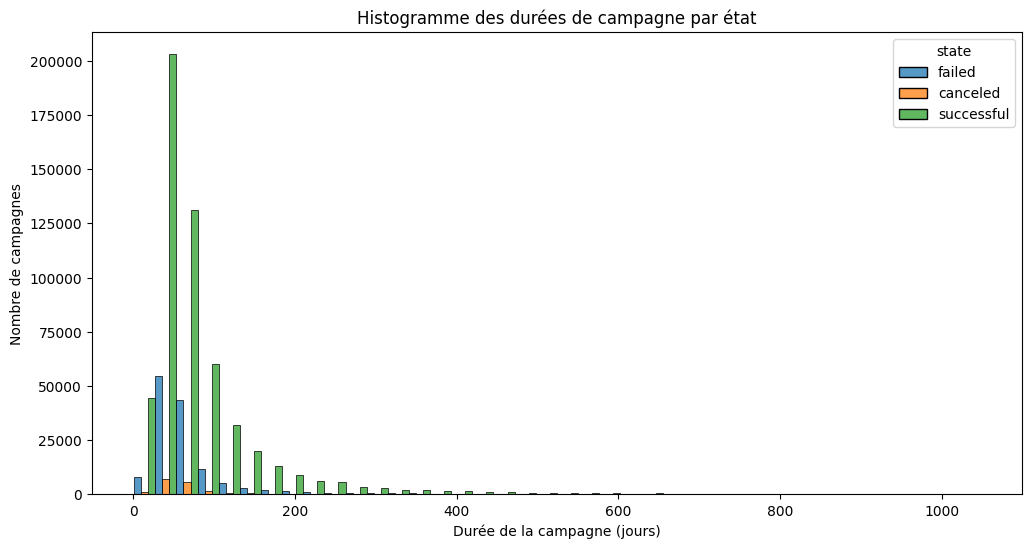

In [ ]:
#Histogramme des durées de campagne par état
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='campaign_duration', hue='state', multiple='dodge', kde=False, bins=40)
plt.title("Histogramme des durées de campagne par état")
plt.xlabel("Durée de la campagne (jours)")
plt.ylabel("Nombre de campagnes")
plt.show()

L’analyse des durées de campagne montre que la majorité des projets réussis se concentrent autour de 30 jours. Au-delà de 60 jours, les chances de succès diminuent nettement, ce qui suggère qu’une durée trop longue n’augmente pas les chances de réussite, mais au contraire favorise l’échec.

# **HYPOTHESE 4**

**Géographiques : Est-ce que certains pays réussissent mieux que d'autres, en particulier les USA (Kickstarter étant une entreprise américaine) ?**

   country  success_rate  n_projects
11      HK      0.935415       24820
14      JP      0.896542       10439
22      SG      0.833893        5659
9       GB      0.828244       89336
3       CA      0.797446       38681
15      LU      0.794521         365
6       DK      0.787655        2981
12      IE      0.784462        2510
24      US      0.783399      398600
17      NL      0.776530        5701


/tmp/ipython-input-841447481.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




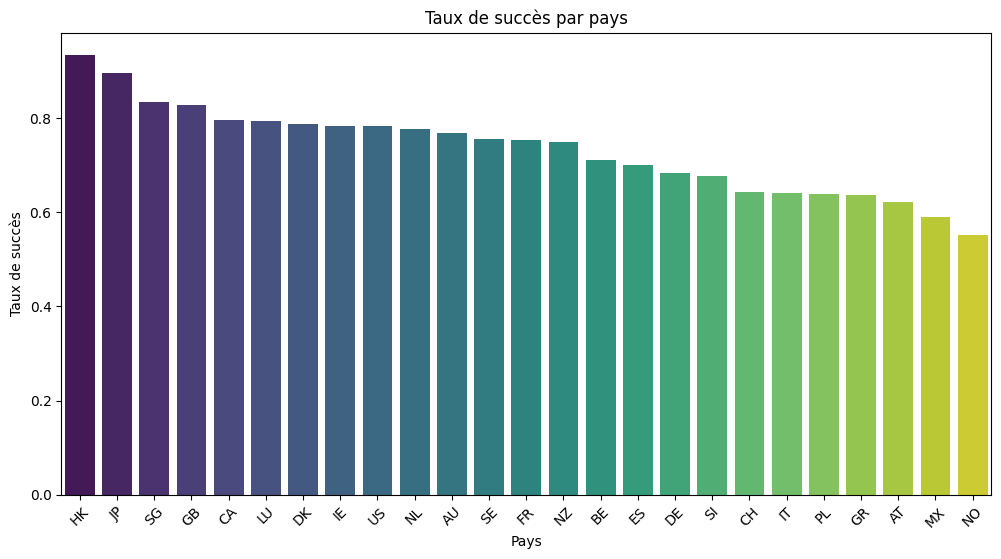

Taux de succès aux USA : 78.34%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
file_path = 'https://drive.google.com/uc?id=13CkjsBM1Qcgz-WRlm7krz8946IQNcE6H'
df = pd.read_parquet(file_path)
# 1. Créer une variable "success" à partir de l'état de la campagne
df["success"] = df["state"].apply(lambda x: 1 if x == "successful" else 0)

# 2. Calcul du taux de succès par pays
success_rate_country = (
    df.groupby("country")["success"]
      .agg(["mean", "count"])
      .reset_index()
      .rename(columns={"mean": "success_rate", "count": "n_projects"})
)

# 3. Trier par taux de succès
success_rate_country = success_rate_country.sort_values("success_rate", ascending=False)

print(success_rate_country.head(10))  # top 10 pays

# 4. Visualiser
plt.figure(figsize=(12,6))
sns.barplot(
    data=success_rate_country,
    x="country",
    y="success_rate",
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Taux de succès par pays")
plt.ylabel("Taux de succès")
plt.xlabel("Pays")
plt.show()

# 5. Comparer spécifiquement les USA aux autres
usa_rate = success_rate_country.query("country == 'US'")["success_rate"].values[0]
print(f"Taux de succès aux USA : {usa_rate:.2%}")

Le graphique montre des variations visibles entre pays :



*   Certains pays (par ex. HK, JP) affichent des taux de succès supérieurs à 85 %.

*   D’autres pays (par ex. NO, MX) sont en dessous de 65 %.


*   Les USA, qui représentent une grosse partie des projets, ont un taux de succès autour de 78 %.




Le test du Chi² donne :

Chi² = 12528.37

p-value = 0.0 (extrêmement significatif).

**Interprétation**


*   Impact du pays confirmé :
La localisation géographique d’une campagne influence fortement son succès.
→ Tous les pays n’offrent pas les mêmes chances de réussite.
*   USA : un cas intéressant :
  

    *   Avec un taux de 78 %, les USA ne sont pas les tout premiers, mais restent dans la moyenne haute.
    *  Cela peut s’expliquer par un grand nombre de projets (plus de concurrence) ou une forte expérience dans la préparation des campagnes.

*   Certains pays (HK, JP) semblent avoir un avantage marqué. D’autres (NO, MX, AT) ont plus de difficultés à atteindre leurs objectifs.


Conclusion

La localisation (pays) a un impact significatif sur le succès des campagnes.

Les différences observées entre pays ne sont pas dues au hasard mais reflètent probablement :

Des différences culturelles dans l’adoption du financement participatif.

La taille et la maturité des communautés de contributeurs.

Le soutien (ou non) des plateformes dans certains pays.















# **HYPOTHESE 5**

**Temporelles : Y a t-il une tendance à la baisse ou à la hausse en fonction des années ?**


   launch_year  success_rate
0         2022      0.742513
1         2023      0.790861
2         2024      0.838514


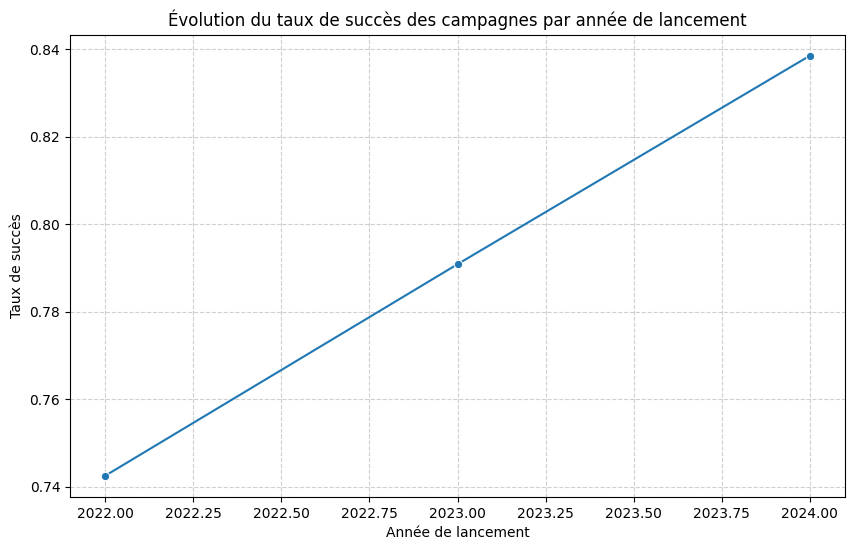

Optimization terminated successfully.
         Current function value: 0.520310
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:               694713
Model:                          Logit   Df Residuals:                   694711
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Sep 2025   Pseudo R-squ.:                0.007214
Time:                        11:50:15   Log-Likelihood:            -3.6147e+05
converged:                       True   LL-Null:                   -3.6409e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -583.8495      8.168    -71.481      0.000    -599.858    -567.841
launch_year     0.2893   

In [ ]:
# Extraire l'année
df["launch_year"] = df["created_at"].dt.year

# Taux de succès par année
success_rate_year = (
    df.groupby("launch_year")["success"]
      .mean()
      .reset_index()
      .rename(columns={"success": "success_rate"})
)

print(success_rate_year)
plt.figure(figsize=(10,6))
sns.lineplot(data=success_rate_year, x="launch_year", y="success_rate", marker="o")
plt.title("Évolution du taux de succès des campagnes par année de lancement")
plt.xlabel("Année de lancement")
plt.ylabel("Taux de succès")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
import statsmodels.api as sm

# Régression logistique : succès ~ année
X = sm.add_constant(df["launch_year"])
y = df["success"]

model = sm.Logit(y, X).fit()
print(model.summary())

Analyse des résultats

*   2022 : le taux de succès est d’environ 74 %.
*   2023 : il augmente à environ 79 %.
*   2024 : il atteint près de 84 %.

On observe donc une progression régulière et continue du taux de succès des campagnes de financement participatif entre 2022 et 2024.


Interprétation

Tendance positive :

1.   Le graphique montre une courbe ascendante, indiquant que les campagnes récentes réussissent davantage que celles lancées il y a deux ans.
2.   Possible maturation du marché :


  *   Les porteurs de projets ont peut-être appris à mieux préparer leurs campagnes (meilleure communication, objectifs plus réalistes).
  *   Les contributeurs peuvent être devenus plus confiants dans ce mode de financement, ce qui augmente la probabilité de succès.


3.   Cette hausse pourrait être liée à des changements économiques, technologiques (plateformes plus efficaces), ou culturels (popularité croissante du financement participatif).

Conclusion

Entre 2022 et 2024, le taux de succès des campagnes de financement participatif est en nette hausse, passant de 74 % à 84 %.
Cela indique que la localisation temporelle (année de lancement) influence positivement les résultats des campagnes, avec une amélioration continue.

















# **Sythèse globale des résultats**

Ce projet visait à identifier les facteurs influençant le succès des campagnes Kickstarter sur les trois dernières années (2022-2024) en explorant cinq hypothèses clés. Les analyses ont révélé les points suivants :



Ce projet visait à identifier les facteurs influençant le succès des campagnes Kickstarter sur les trois dernières années (2022-2024) en explorant cinq hypothèses clés. Les analyses ont révélé les points suivants :

**HYPOTHESE 1 : Thèmes (Catégories)**

*   **Impact significatif :** Le choix de la catégorie a un impact majeur sur la probabilité de succès. Certaines catégories, comme la Danse, le Théâtre, les Comics et la Musique, affichent des taux de succès élevés, tandis que d'autres, comme la Technologie, les Jeux et le Design, présentent des taux de succès nettement plus faibles.
*   **Risque variable :** Au-delà du taux de succès moyen, l'analyse de la proportion d'échecs et d'annulations par catégorie est cruciale pour évaluer le risque. Certaines catégories (Apps, Bacon, Accessories) cumulent structurellement beaucoup d'échecs.
*   **Recommandations :** Cibler stratégiquement les catégories à fort succès, renforcer l'accompagnement pour les catégories plus risquées et adapter la communication marketing en fonction de la catégorie sont des pistes pour optimiser la plateforme.

**HYPOTHESE 2 : Financière (Objectif fixé/Montant)**

*   **Corrélation négative :** Il existe une relation claire et négative entre le montant de l'objectif fixé et la probabilité de succès. Plus l'objectif est élevé, plus les chances de réussite diminuent.
*   **Objectifs modestes favorisés :** Les campagnes avec des objectifs modestes (idéalement inférieurs à 10 000 €) ont non seulement de plus grandes chances de succès, mais bénéficient souvent d'un surfinancement important.
*   **Objectifs élevés plus risqués :** Les objectifs élevés sont plus risqués, avec une majorité de campagnes n'atteignant pas leur objectif, bien que certaines réussissent et génèrent des montants très supérieurs à l'objectif initial.
*   **Insight métier :** Fixer un objectif réaliste, potentiellement en segmentant les objectifs élevés en paliers, est conseillé pour maximiser les chances de succès et de surfinancement.

**HYPOTHESE 3 : Durée de la campagne**

*   **Durée optimale :** La majorité des projets réussis se concentrent autour d'une durée de campagne de 30 jours.
*   **Durée excessive défavorable :** Au-delà de 60 jours, les chances de succès diminuent nettement, suggérant qu'une durée trop longue n'est pas bénéfique.

**HYPOTHESE 4 : Géographiques (Pays)**

*   **Impact du pays :** La localisation géographique de la campagne influence significativement son succès. Tous les pays n'offrent pas les mêmes chances de réussite.
*   **Variations notables :** Certains pays (HK, JP) affichent des taux de succès supérieurs à 85 %, tandis que d'autres (NO, MX) sont en dessous de 65 %. Les USA, malgré un grand nombre de projets, se situent dans la moyenne haute (environ 78 %).
*   **Facteurs potentiels :** Ces différences peuvent s'expliquer par des facteurs culturels, la maturité des communautés de contributeurs et le soutien des plateformes dans chaque pays.

**HYPOTHESE 5 : Temporelles (Année de lancement)**

*   **Tendance positive :** Entre 2022 et 2024, on observe une progression régulière et continue du taux de succès des campagnes, passant de 74 % à 84 %.
*   **Maturation du marché :** Cette hausse suggère une possible maturation du marché, avec des porteurs de projets mieux préparés et des contributeurs plus confiants.
*   **Influence positive :** La localisation temporelle (année de lancement) influence positivement les résultats des campagnes.

**Conclusion Générale**

En synthèse, plusieurs facteurs influencent de manière significative le succès d'une campagne Kickstarter. Le choix de la **catégorie**, le **montant de l'objectif fixé**, la **durée de la campagne** et la **localisation géographique** jouent un rôle important. De plus, il existe une **tendance positive générale** du taux de succès au fil des années, indiquant une évolution favorable du marché du financement participatif. Pour maximiser les chances de succès, il est crucial de prendre en compte ces différents facteurs lors de la planification et de l'exécution d'une campagne.